**Задание 1:**

Сделать инверсию по каждому цветовому каналу в изображении.

In [7]:
import os
dir = os.path.abspath(os.curdir)
dir

'c:\\Users\\user\\Desktop\\TMS_DS\\Lesson_8'

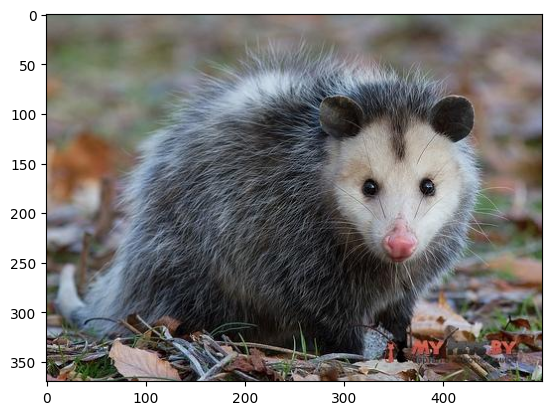

In [15]:
import matplotlib.pyplot as plt
img = plt.imread(dir + "\\files\\img_1.jpg")
plt.imshow(img)

In [16]:
img.shape

(370, 500, 3)

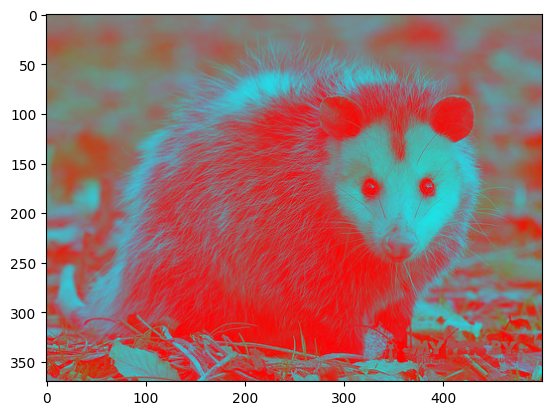

In [42]:
data = img.copy()
for i in range(data.shape[0]):
    for j in range(data.shape[1]):

        data[i, j, 0] = 255 - data[i, j, 1]

                
plt.imshow(data)

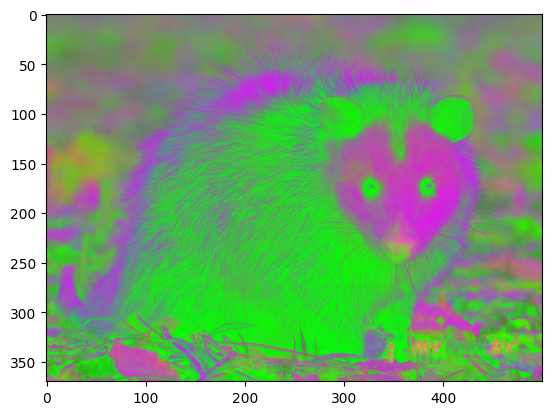

In [43]:
data = img.copy()
for i in range(data.shape[0]):
    for j in range(data.shape[1]):

        data[i, j, 1] = 255 - data[i, j, 1]

                
plt.imshow(data)

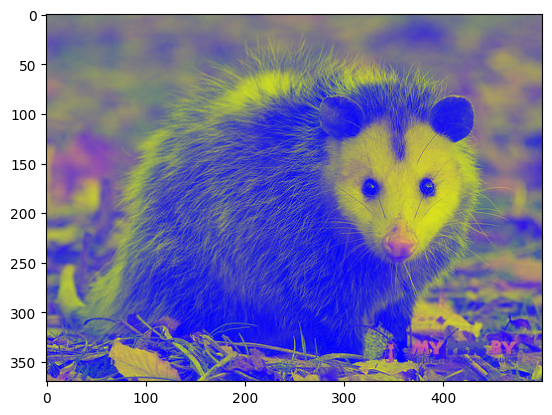

In [44]:
data = img.copy()
for i in range(data.shape[0]):
    for j in range(data.shape[1]):

        data[i, j, 2] = 255 - data[i, j, 1]

                
plt.imshow(data)

**Задание 2:**

Изучить датасет и посчитать базовые метрики (среднее, сумма, частота, количество пропусков и тд). 
Сопоставить колонки Fare и Embarked. Придумать свою группировку на основе имеющихся или же новых колонок. Объяснить ее смысловое значение (что полезного может быть в информации из этой группировки)
Доп. задание Найти супружеские пары, дети-родители, братья-сестры, используя имеющиеся колонки.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

train_df = pd.read_csv("files/train.csv")

Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

Name — имя;

Sex — пол;

Age — возраст;

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
train_df.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
ess_table = train_df.groupby(["Embarked", "Sex","Survived"]).size().unstack(fill_value=0)
ess_table

Survived           0    1
Embarked Sex             
C        female    9   64
         male     66   29
Q        female    9   27
         male     38    3
S        female   63  140
         male    364   77

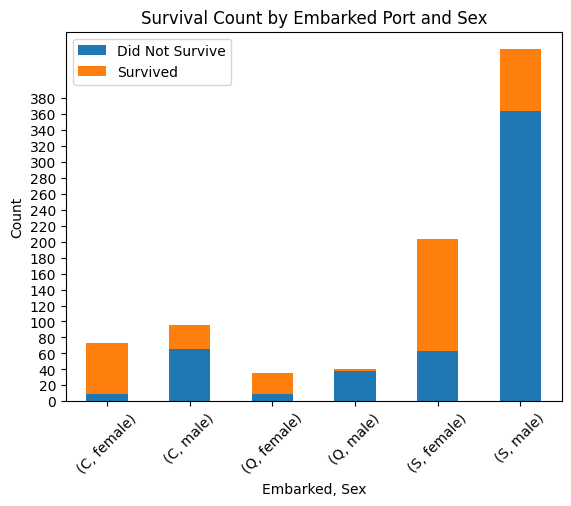

In [117]:
ess_table.plot(kind='bar', stacked=True).legend(['Did Not Survive', 'Survived'])

plt.title('Survival Count by Embarked Port and Sex')
plt.xlabel('Embarked, Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)

max_count = ess_table.values.max()
yticks = range(0, max_count + 20, 20)
plt.yticks(yticks)

plt.show()

In [31]:
me_table = train_df.groupby('Embarked')['Fare'].agg(['min', 'mean', 'max'])
me_table

,min,mean,max
Embarked,,,
C,4.0125,59.954144,512.3292
Q,6.7500,13.276030,90.0000
S,0.0000,27.079812,263.0000


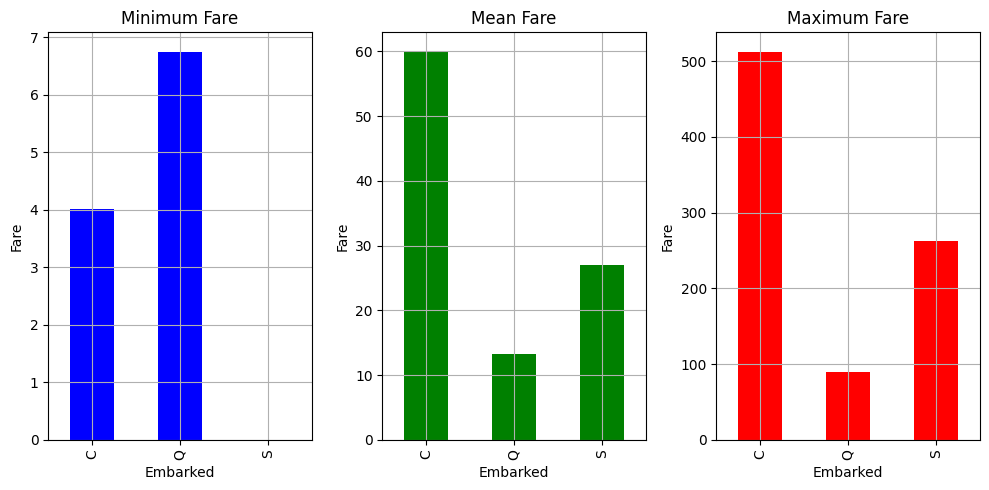

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

me_table['min'].plot(kind='bar', ax=axes[0], color='blue', title='Minimum Fare')
me_table['mean'].plot(kind='bar', ax=axes[1], color='green', title='Mean Fare')
me_table['max'].plot(kind='bar', ax=axes[2], color='red', title='Maximum Fare')

for ax in axes:
    ax.set_xlabel('Embarked')
    ax.set_ylabel('Fare')
    ax.grid(True)

plt.tight_layout()
plt.show()

*   SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;
*   Parch — количество родителей, детей (в том числе приемных) на борту титаника;

In [110]:
# Супружеские пары
p = train_df[(train_df["SibSp"] >= 1) & (train_df["Name"].str.contains("Miss.") | train_df["Name"].str.contains("Mr."))].copy()

p[["LastName", "FirstName"]] = p["Name"].str.split(',', expand = True)

sreplace = ["Miss.", "Mr.", "Mrs."]
p["FirstName"] = p["FirstName"].replace(sreplace, "")

p = p[p["SibSp"] >= 1]

pairs = p.groupby("LastName").filter(lambda x: any(x["Sex"] == "male") and any(x["Sex"] == "female"))

pairs[["LastName", "FirstName", "Sex"]].sort_values(by="LastName").reset_index()

,index,LastName,FirstName,Sex
0,746,Abbott,Mr. Rossmore Edward,male
1,279,Abbott,Mrs. Stanton (Rosa Hunt),female
2,308,Abelson,Mr. Samuel,male
3,874,Abelson,Mrs. Samuel (Hannah Wizosky),female
4,13,Andersson,Mr. Anders Johan,male
...,...,...,...,...
124,472,West,Mrs. Edwy Arthur (Ada Mary Worth),female
125,58,West,Miss. Constance Mirium,female
126,450,West,Mr. Edwy Arthur,male
127,830,Yasbeck,Mrs. Antoni (Selini Alexander),female


In [111]:
pairs[["LastName", "FirstName", "Sex"]].sort_values(by="LastName")[120:130].reset_index()

,index,LastName,FirstName,Sex
0,595,Van Impe,Mr. Jean Baptiste,male
1,38,Vander Planke,Miss. Augusta Maria,female
2,18,Vander Planke,Mrs. Julius (Emelia Maria Vandemoortele),female
3,333,Vander Planke,Mr. Leo Edmondus,male
4,472,West,Mrs. Edwy Arthur (Ada Mary Worth),female
5,58,West,Miss. Constance Mirium,female
6,450,West,Mr. Edwy Arthur,male
7,830,Yasbeck,Mrs. Antoni (Selini Alexander),female
8,620,Yasbeck,Mr. Antoni,male


In [113]:
train_df[train_df["Name"].str.contains("Planke")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,PairCount
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0,NaN,S,Vander Planke,1
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0,NaN,S,Vander Planke,2
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0,NaN,S,Vander Planke,2


In [114]:
train_df[train_df["Name"].str.contains("West")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,PairCount
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.75,NaN,S,West,3
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.75,NaN,S,West,3
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.75,NaN,S,West,3


In [ ]:
# Дети-родители

In [ ]:
# Братья-сестры